In [58]:
import os 
path = ('/Users/gabriel/Documents/data')
os.chdir(path)

In [59]:
pwd

'/Users/gabriel/Documents/data'

# Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
print('Pandas version: {}'.format(pd.__version__))
print('Numpy version: {}'.format( np.__version__))
#print('Matplotlib version: {}'.format(matplotlib.__version__))
print('Seaborn version: {}'.format(sns.__version__))

Pandas version: 0.23.4
Numpy version: 1.15.4
Seaborn version: 0.9.0


# Basic Info

In [61]:
raw_main = pd.read_csv('main_v1.csv')
main_df = raw_main.copy()
main_df.head(2)

,QUOTEUUID,QUOTEDATE,PG1,PE1,PL1,PM1,PN1,PO1,APC,C1,...,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
0,6e042b6c-55cc-492e-b4ca-1e521d899b88,2020-10-01,54,2.0,1.0,M,6,9.0,ST29JJ,Comprehensive,...,10.0,10.0,6345.0,250.0,0,4000.0,At Home,610,39.49,382.0
1,6da8f9fd-0bee-45b8-9ab4-e6d49a577c68,2020-10-01,28,0.0,1.0,S,5,9.0,WF134HT,Comprehensive,...,10.0,5.0,4000.0,500.0,0,8000.0,At Home,229,229.33,1176.0


In [62]:
print('Dataset rows and columns:', main_df.shape)
print('Targets rows and columns:',main_df['GWP'].shape)

Dataset rows and columns: (647206, 32)
Targets rows and columns: (647206,)


In [63]:
main_df.describe(include = 'all').round(1)

,QUOTEUUID,QUOTEDATE,PG1,PE1,PL1,PM1,PN1,PO1,APC,C1,...,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
count,647206,647206,647206.0,647206.0,647181.0,647206,647206.0,642334.0,647206,647206,...,544188.0,606803.0,647206.0,647206.0,647206.0,626594.0,647206,647206.0,599089.0,647206.0
unique,647206,7,NaN,NaN,NaN,10,NaN,NaN,281469,3,...,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
top,011ac1cd-2f63-4d9b-95d4-70d0bff7dbda,2020-10-05,NaN,NaN,NaN,M,NaN,NaN,PE26YS,Comprehensive,...,NaN,NaN,NaN,NaN,NaN,NaN,At Home,NaN,NaN,NaN
freq,1,104000,NaN,NaN,NaN,312907,NaN,NaN,1960,646356,...,NaN,NaN,NaN,NaN,NaN,NaN,582516,NaN,NaN,NaN
mean,NaN,NaN,47.2,1.5,1.0,NaN,7.3,8.9,NaN,NaN,...,9.8,7.6,9020.4,225.7,0.0,8613.7,NaN,887.6,113.0,963.7
std,NaN,NaN,15.6,1.0,0.0,NaN,4.1,0.8,NaN,NaN,...,0.9,13.6,6991.3,156.7,0.0,8266.3,NaN,900.5,123.9,892.0
min,NaN,NaN,19.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,...,2.0,0.0,0.0,0.0,0.0,0.0,NaN,-2515.0,0.0,67.0
25%,NaN,NaN,34.0,1.0,1.0,NaN,4.0,9.0,NaN,NaN,...,10.0,3.0,4180.0,100.0,0.0,5000.0,NaN,122.0,41.3,438.0
50%,NaN,NaN,45.0,2.0,1.0,NaN,9.0,9.0,NaN,NaN,...,10.0,6.0,7095.0,250.0,0.0,8000.0,NaN,731.0,72.8,688.0
75%,NaN,NaN,59.0,2.0,1.0,NaN,9.0,9.0,NaN,NaN,...,10.0,8.0,11945.0,250.0,0.0,10000.0,NaN,1307.0,136.3,1154.0


In [64]:
main_df['QUOTEDATE'].unique() #First week of October is only considered

array(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
       '2020-10-05', '2020-10-06', '2020-10-07'], dtype=object)

In [65]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647206 entries, 0 to 647205
Data columns (total 32 columns):
QUOTEUUID    647206 non-null object
QUOTEDATE    647206 non-null object
PG1          647206 non-null int64
PE1          647206 non-null float64
PL1          647181 non-null float64
PM1          647206 non-null object
PN1          647206 non-null int64
PO1          642334 non-null float64
APC          647206 non-null object
C1           647206 non-null object
C2           166598 non-null object
D0           647206 non-null int64
D1           627655 non-null float64
D2           627467 non-null float64
D3           627467 non-null float64
D4           627655 non-null float64
D5           601212 non-null float64
D6           599902 non-null float64
QTI          647206 non-null int64
V0           544188 non-null float64
V1           544188 non-null float64
V10          647206 non-null int64
V2           544188 non-null float64
V3           606803 non-null float64
V4           6472

In [66]:
main_df.isna().sum() #Detects the amount of missing values.

QUOTEUUID         0
QUOTEDATE         0
PG1               0
PE1               0
PL1              25
PM1               0
PN1               0
PO1            4872
APC               0
C1                0
C2           480608
D0                0
D1            19551
D2            19739
D3            19739
D4            19551
D5            45994
D6            47304
QTI               0
V0           103018
V1           103018
V10               0
V2           103018
V3            40403
V4                0
V5                0
V6                0
V7            20612
V8                0
V9                0
TP            48117
GWP               0
dtype: int64

In [67]:
main_df = main_df.drop(['QUOTEUUID','QUOTEDATE','APC'],axis = 1) #Dropping meaningless information for this purpose.
main_df.head()

,PG1,PE1,PL1,PM1,PN1,PO1,C1,C2,D0,D1,...,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
0,54,2.0,1.0,M,6,9.0,Comprehensive,L,0,708.0,...,10.0,10.0,6345.0,250.0,0,4000.0,At Home,610,39.49,382.0
1,28,0.0,1.0,S,5,9.0,Comprehensive,NaN,0,746.0,...,10.0,5.0,4000.0,500.0,0,8000.0,At Home,229,229.33,1176.0
2,25,0.0,1.0,S,5,9.0,Comprehensive,NaN,0,809.0,...,8.0,9.0,2800.0,150.0,0,8000.0,At Home,76,286.27,2152.0
3,26,0.0,1.0,S,4,9.0,Comprehensive,NaN,0,708.0,...,10.0,6.0,6700.0,250.0,0,8000.0,At Home,789,246.94,1878.0
4,82,2.0,1.0,M,2,9.0,Comprehensive,NaN,0,816.0,...,10.0,2.0,7795.0,0.0,0,10000.0,At Home,761,31.43,412.0


In [68]:
print(main_df.columns)
print(len(main_df.columns))

Index(['PG1', 'PE1', 'PL1', 'PM1', 'PN1', 'PO1', 'C1', 'C2', 'D0', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'QTI', 'V0', 'V1', 'V10', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'TP', 'GWP'],
      dtype='object')
29


In [69]:
#Checkpoint. First processed part
main_df_p1 = main_df.copy()
main_df_p1.head(3)
#Now we have all features and the targets(GWP)

,PG1,PE1,PL1,PM1,PN1,PO1,C1,C2,D0,D1,...,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
0,54,2.0,1.0,M,6,9.0,Comprehensive,L,0,708.0,...,10.0,10.0,6345.0,250.0,0,4000.0,At Home,610,39.49,382.0
1,28,0.0,1.0,S,5,9.0,Comprehensive,NaN,0,746.0,...,10.0,5.0,4000.0,500.0,0,8000.0,At Home,229,229.33,1176.0
2,25,0.0,1.0,S,5,9.0,Comprehensive,NaN,0,809.0,...,8.0,9.0,2800.0,150.0,0,8000.0,At Home,76,286.27,2152.0


# Categorical Data Exploration

In [70]:
columns = list(main_df_p1)
categorical_col = ['PM1','C1','C2','V8']
numeric_col = [x for x in columns if x not in categorical_col]

print('Categorical features:', categorical_col, 'Total:', len(categorical_col))

print('Numerical features:',numeric_col, 'Total:', len(numeric_col) )

Categorical features: ['PM1', 'C1', 'C2', 'V8'] Total: 4
Numerical features: ['PG1', 'PE1', 'PL1', 'PN1', 'PO1', 'D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'QTI', 'V0', 'V1', 'V10', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'TP', 'GWP'] Total: 25


In [71]:
main_df_p1.columns

Index(['PG1', 'PE1', 'PL1', 'PM1', 'PN1', 'PO1', 'C1', 'C2', 'D0', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'QTI', 'V0', 'V1', 'V10', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'TP', 'GWP'],
      dtype='object')

## PM1

['M' 'S' 'P' 'D' 'W' 'B' 'C' 'A' 'O' 'N']
(10,)


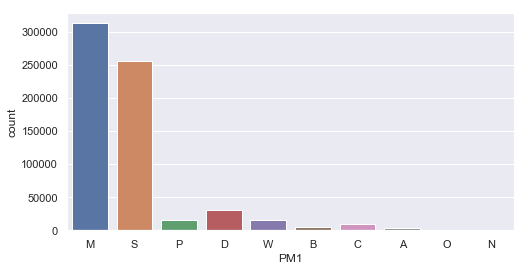

In [72]:
pm1 = (main_df_p1['PM1'])
print(pm1.unique())
print(pm1.unique().shape)

plt.figure(figsize = (8,4))
sns.countplot(x = 'PM1', data = main_df_p1)

## C1

['Comprehensive' 'Third Party Fire and Theft' 'Third Party Only']
(3,)


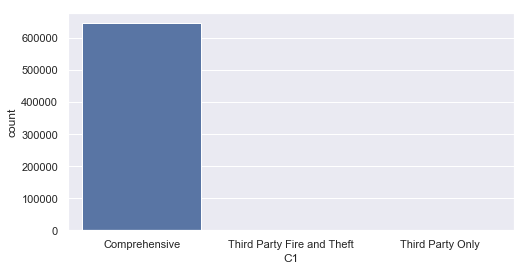

In [73]:
c1 = (main_df_p1['C1'])
print(c1.unique())
print(c1.unique().shape)

plt.figure(figsize = (8,4))
sns.countplot(x = 'C1', data = main_df_p1)

## C2 and Terms

In [74]:
terms_df = pd.read_csv('terms_v1.csv')
terms_df

,C2,C3
0,A,150
1,B,150
2,C,150
3,D,150
4,L,200
5,M,250
6,N,350
7,O,400
8,NAN,150
9,NaN,150


In [75]:
terms_df.iloc[0:8,:] 

,C2,C3
0,A,150
1,B,150
2,C,150
3,D,150
4,L,200
5,M,250
6,N,350
7,O,400


['L' nan 'B' 'A' 'M' 'N' 'O']
(7,)


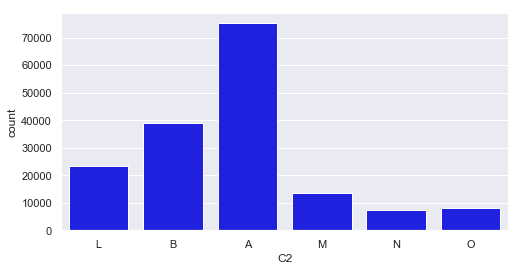

In [76]:
c2 = (main_df_p1['C2'])
print(c2.unique())
print(c2.unique().shape)

plt.figure(figsize = (8,4))
sns.countplot(x = 'C2', data = main_df_p1, color = 'blue')

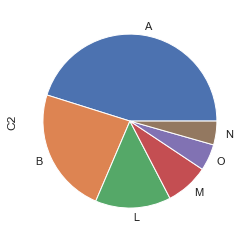

In [77]:
main_df_p1.C2.value_counts().plot(kind="pie")

## V8

At Home           582516
Garage             62601
Car Park            1629
Secure Carpark       460
Name: V8, dtype: int64
['At Home' 'Garage' 'Car Park' 'Secure Carpark']
(4,)


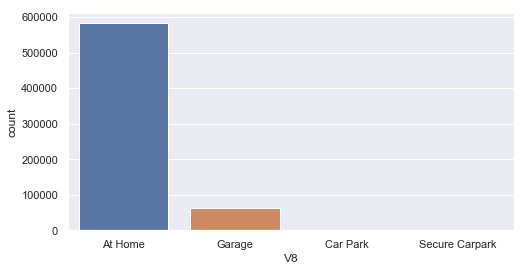

In [78]:
v8 = (main_df_p1['V8'])
print(v8.value_counts())
print(v8.unique())
print(v8.unique().shape)


plt.figure(figsize = (8,4))
sns.countplot(x = 'V8', data = main_df_p1)

## Area

In [79]:
area_df = pd.read_csv('area_v1.csv')
area_df.head()

,APC,A0,A1,A2,A3
0,ST29JJ,West Midlands,54.0,45.0,62.0
1,WF134HT,Yorks and Humbs,80.0,71.0,73.0
2,CT93UH,South-East England,25.0,43.0,50.0
3,CF55DY,Wales,51.0,56.0,63.0
4,IP313HQ,East Anglia,21.0,20.0,34.0


In [80]:
print(area_df.shape)

(281469, 5)


['West Midlands' 'Yorks and Humbs' 'South-East England' 'Wales'
 'East Anglia' 'North-West England' 'Scotland' 'South-West England'
 'East Midlands' 'North-East England' 'Greater London' 'Others'
 'Non-Mainland UK ']
(13,)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

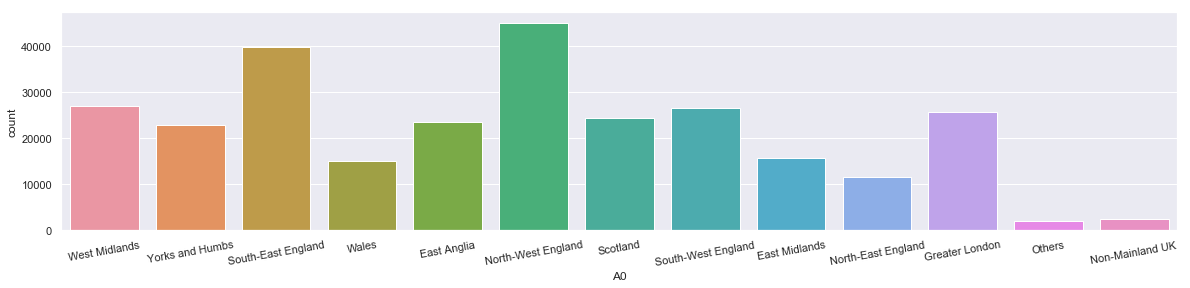

In [81]:
a0 = (area_df['A0'])
print(a0.unique())
print(a0.unique().shape)

plt.figure(figsize = (20,4))
sns.countplot(x = 'A0', data = area_df)
plt.xticks(rotation = 10)

In [82]:
#Checkpoint 2
main_df_p2 = main_df_p1.copy()

In [83]:
area_df = area_df.drop(['APC'],axis = 1)
area_df.head()

,A0,A1,A2,A3
0,West Midlands,54.0,45.0,62.0
1,Yorks and Humbs,80.0,71.0,73.0
2,South-East England,25.0,43.0,50.0
3,Wales,51.0,56.0,63.0
4,East Anglia,21.0,20.0,34.0


## Include Area Data to Main Dataset

I aim to add to the main dataset the features encountered in the test datasets that are NOT included in the main (A0, A1, A2, A3, and C3). Then when the model is trained using the main dataset, it would benefit from those features, hopefully then making better predictions for the test1 and test2.

In [92]:
main_df_p2 = pd.concat([main_df_p2,area_df],axis = 1)

In [93]:
main_df_p2.columns

Index(['PG1', 'PE1', 'PL1', 'PM1', 'PN1', 'PO1', 'C1', 'C2', 'D0', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'QTI', 'V0', 'V1', 'V10', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'TP', 'GWP', 'A0', 'A1', 'A2', 'A3'],
      dtype='object')

In [94]:
columns_ordered = ['A0', 'A1', 'A2', 'A3','PG1', 'PE1', 'PL1', 'PM1', 'PN1', 'PO1', 'C1', 'C2', 'D0', 'D1', 'D2',
       'D3', 'D4', 'D5', 'D6', 'QTI', 'V0', 'V1', 'V10', 'V2', 'V3', 'V4',
       'V5', 'V6', 'V7', 'V8', 'V9', 'TP', 'GWP' ]

In [95]:
main_df_p3 = main_df_p2[columns_ordered]

In [96]:
main_df_p3.head(2)

,A0,A1,A2,A3,PG1,PE1,PL1,PM1,PN1,PO1,...,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
0,West Midlands,54.0,45.0,62.0,54,2.0,1.0,M,6,9.0,...,10.0,10.0,6345.0,250.0,0,4000.0,At Home,610,39.49,382.0
1,Yorks and Humbs,80.0,71.0,73.0,28,0.0,1.0,S,5,9.0,...,10.0,5.0,4000.0,500.0,0,8000.0,At Home,229,229.33,1176.0


In [97]:
print(main_df_p3.shape)

(647206, 33)


In [98]:
pd.options.display.max_columns = None #So that I can display all columns

In [99]:
display(main_df_p3.head(10))

,A0,A1,A2,A3,PG1,PE1,PL1,PM1,PN1,PO1,C1,C2,D0,D1,D2,D3,D4,D5,D6,QTI,V0,V1,V10,V2,V3,V4,V5,V6,V7,V8,V9,TP,GWP
0,West Midlands,54.0,45.0,62.0,54,2.0,1.0,M,6,9.0,Comprehensive,L,0,708.0,0.0,0.0,21.0,42.0,155.0,30,51.0,63.0,1,10.0,10.0,6345.0,250.0,0,4000.0,At Home,610,39.49,382.0
1,Yorks and Humbs,80.0,71.0,73.0,28,0.0,1.0,S,5,9.0,Comprehensive,NaN,0,746.0,0.0,0.0,13.0,39.0,112.0,15,41.0,21.0,1,10.0,5.0,4000.0,500.0,0,8000.0,At Home,229,229.33,1176.0
2,South-East England,25.0,43.0,50.0,25,0.0,1.0,S,5,9.0,Comprehensive,NaN,0,809.0,0.0,0.0,7.0,37.0,106.0,15,74.0,29.0,1,8.0,9.0,2800.0,150.0,0,8000.0,At Home,76,286.27,2152.0
3,Wales,51.0,56.0,63.0,26,0.0,1.0,S,4,9.0,Comprehensive,NaN,0,708.0,0.0,0.0,17.0,42.0,119.0,28,62.0,42.0,1,10.0,6.0,6700.0,250.0,0,8000.0,At Home,789,246.94,1878.0
4,East Anglia,21.0,20.0,34.0,82,2.0,1.0,M,2,9.0,Comprehensive,NaN,0,816.0,0.0,0.0,19.0,39.0,111.0,30,32.0,19.0,1,10.0,2.0,7795.0,0.0,0,10000.0,At Home,761,31.43,412.0
5,North-West England,58.0,71.0,79.0,51,2.0,1.0,S,3,9.0,Comprehensive,NaN,0,713.0,0.0,0.0,17.0,41.0,106.0,23,34.0,41.0,1,10.0,1.0,10095.0,250.0,0,8000.0,At Home,419,530.42,1828.0
6,East Anglia,57.0,73.0,49.0,42,2.0,1.0,M,9,9.0,Comprehensive,B,0,830.0,0.0,0.0,17.0,46.0,121.0,1,39.0,63.0,1,10.0,8.0,8650.0,250.0,0,8000.0,Garage,1584,25.92,648.0
7,Wales,34.0,41.0,46.0,28,0.0,1.0,S,3,9.0,Comprehensive,NaN,0,880.0,0.0,0.0,21.0,35.0,99.0,30,20.0,32.0,1,8.0,3.0,5300.0,150.0,0,9000.0,At Home,1126,255.95,1258.0
8,North-West England,75.0,62.0,89.0,35,1.0,1.0,M,9,9.0,Comprehensive,NaN,0,831.0,0.0,0.0,21.0,38.0,109.0,19,46.0,20.0,1,8.0,8.0,3700.0,250.0,0,7000.0,At Home,627,168.34,791.0
9,Yorks and Humbs,36.0,38.0,47.0,79,2.0,1.0,S,10,9.0,Comprehensive,NaN,0,843.0,0.0,0.0,21.0,38.0,99.0,30,91.0,39.0,1,8.0,12.0,2200.0,0.0,0,8000.0,At Home,3683,37.79,389.0


## V10 and Fuels

In [100]:
fuels_df = pd.read_csv('fuels_v1.csv')
fuels_df

,V10,vtype
0,1.0,Non-Electric
1,2.0,Electric
2,4.0,Others
3,NaN,Others
4,NaN,Others


In [101]:
main_df_p3['V10'].unique()

array([1, 2, 4])

In [102]:
#main_df_p3.to_csv('Main_First_Preprocessing.csv', index=False) 
#Saving the first preprocessing

# Correlation

In [103]:
correlation = abs(main_df_p3.corr()).round(1) #absolute values
correlation.shape

(28, 28)

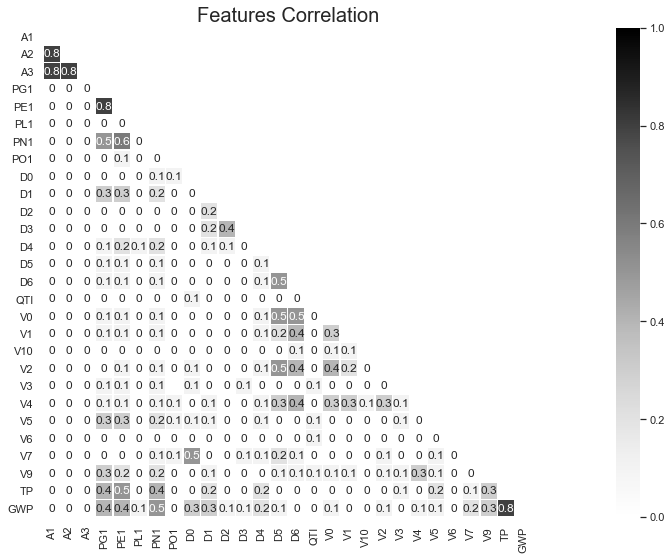

In [104]:
mask = np.triu(np.ones_like(correlation, dtype= bool))

sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(30, 9))
plt.title('Features Correlation',fontsize = 20)
cmap = sns.diverging_palette(10, 250, as_cmap=True)

sns.heatmap(correlation, mask=mask, cmap='Greys', annot = True,
            square=True, vmin = 0, vmax = 1,linewidths=.5, ax=ax)

In [110]:
tp = correlation['TP']
gwp = correlation['GWP']
x0 = sm.add_constant(tp)
results = sm.OLS(gwp,x0).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GWP   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     153.7
Date:                Mon, 01 Mar 2021   Prob (F-statistic):           2.02e-12
Time:                        11:34:02   Log-Likelihood:                 26.773
No. Observations:                  28   AIC:                            -49.55
Df Residuals:                      26   BIC:                            -46.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0523      0.021      2.469      0.020       0.009       0.096
TP             0.8895      0.072     12.399      0.000       0.742       1.037
==============================================================================
Omnibus:                        6.725   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.843
Skew:                           0.903   Prob(JB):                       0.0888
Kurtosis:                       3.944   Cond. No.                         4.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

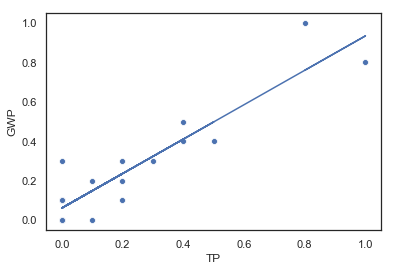

In [111]:
sns.scatterplot(x = tp, y = gwp)
yhat = 0.874*tp + 0.061 #From the table above provided by statsmodels
plt.plot(tp,yhat)
plt.show()

As expected per the heatmap, the correlation between TP and the targets, GWP is high.
Now, check two features that according to the heatmap have 0 correlation, as for example D0 and D1

In [112]:
d0 = np.array(correlation['D0'])
d1 = correlation['D1']
x0 = sm.add_constant(d0)
results = sm.OLS(d1,x0).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     D1   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.4168
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.524
Time:                        11:34:56   Log-Likelihood:                 5.4721
No. Observations:                  28   AIC:                            -6.944
Df Residuals:                      26   BIC:                            -4.280
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1212      0.042      2.867      0.008       0.034       0.208
x1            -0.1220      0.189     -0.646      0.524      -0.510       0.266
==============================================================================
Omnibus:                       43.863   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.820
Skew:                           3.077   Prob(JB):                     1.48e-39
Kurtosis:                      13.742   Cond. No.                         4.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

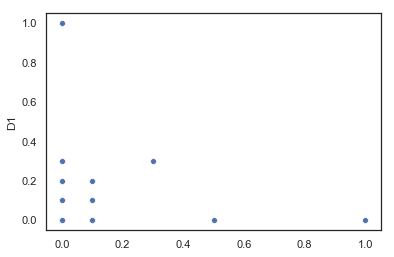

In [113]:
sns.scatterplot(x = d0, y = d1)
plt.show()

As expected per the correlation heatmap, not correlation found between d0 and d1. R-squared very low.

Text(0.5, 1.0, 'heterocedastic dataset')

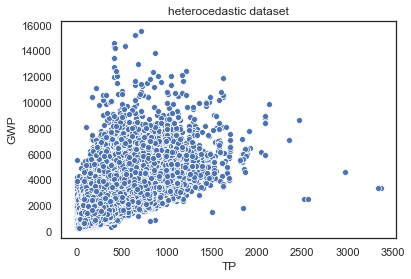

In [114]:
sns.scatterplot(x = main_df['TP'], y = main_df['GWP'])
plt.title('heterocedastic dataset')

Greater variability seen as TP increases

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


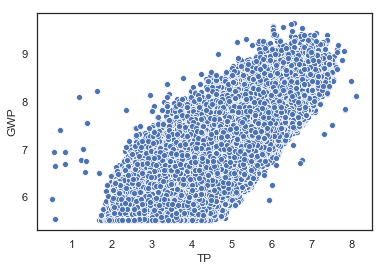

In [115]:
sns.scatterplot(x = np.log(main_df['TP']), y = np.log(main_df['GWP']))

Trying to solve the heterocedasticity by taking the log of both the x and y values.